In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
atainv = np.array([[1/2,-1/2], [-1/2, 3/2]])
At = np.array([[0,1,0,1,1], [0,0,0,1,0]])
b = np.array([0,1,0,1,1])
x = atainv.dot(At.dot(b))
x

array([1., 0.])

# **Remarks**

***Name:*** Yashaswi Sharma

***UID:*** 116245821

***Link To File:*** **https://colab.research.google.com/drive/1rwP_ncekLp8wso4hryFT2q2wYR-zNGI8?usp=sharing**

I am sharing this file because at times google colab has image formatting issues. Hence, with access to this link if there are any images that are misplaced or half presented, the grader will have full and ready access to the actual image.

# **1**

An encoder equates "cat" with vector  {-8,-4} and it equates "dog" with {-6,-3}.

The decoder equates {3, -1} with "animal".

The same encoder  equates "car" with vector  {2,-5} and it equates "truck" with {7,-6}.  The decoder equates {-6, -5} with "machine".

The model is matrix multiplication.  

$T(\vec{v}) = A \cdot \vec{v}$

## **a**

What are the dimensions of the matrix A?

the dimensionality of A is dependent upon the column space of A which is dependent upon the number of independent columns A has. 

Since A maps a 2-D vector to a 2-D output, we know that A has to be 2x2. Hence the dimension of A is **2**.

## **b**

Use least squares to model the error as a function of the matrix A.  Don't refer to the coefficients of A, but instead write the input and output as matrices.  Write the error expression as a matrix expression.

$error = ||B \cdot A - target||_2^2$

## **c**

Use technology to solve the least squares problem.  (either LeastSquares, lsqr, or linalg.lstsq )

In [ ]:
B = np.array([[-8, -4], [-6, -3], [2, -5], [7, -6]])
target = np.array([[3, -1], [3, -1], [-6, -5], [-6, -5]])
print(B.T)
print(target.T)

[[-8 -6  2  7]
 [-4 -3 -5 -6]]
[[ 3  3 -6 -6]
 [-1 -1 -5 -5]]


In [ ]:
A = np.linalg.lstsq(B, target)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [ ]:
print(A)

(array([[-0.62079976, -0.1932492 ],
       [ 0.50881861,  0.71643607]]), array([7.50638589, 1.59023871]), 2, array([12.37172779,  9.27040191]))


## **d**

What is the mean squared error for the solution in (c)?  

Recall the mean squared error is the total of the squared-lengths of the error vectors divided by the number of vectors.

In [ ]:
sum = 0
for i in range(len(B)):
  sum += (np.linalg.norm(A[0].dot(B[i]) - target[i])) ** 2
sum /= 4
print('The MSE is {}'.format(sum))

The MSE is 31.724884111918794


## **e**

Suppose that "mouse" is encoded as {-5,3}   Does T(v) map that closer to "animal" or to "machine" ?  If you consider "mouse" as testing the model, does this test support the model?

In [ ]:
mouse = np.array([-5,3])
out = A[0].dot(mouse)
print(out)

[ 2.52425118 -0.39478486]


In [ ]:
animal = np.array([3,-1])
machine = np.array([-6,-5])
andiff = np.linalg.norm(animal - out) ** 2
mdiff = np.linalg.norm(machine - out) ** 2
print(andiff)
print(mdiff)

0.5926223114451791
93.87086467118367


The model considers the "mouse" encoding to be closer to an animal as compared to a machine. This test does suppro the model

## **f**

Make a picture showing the points in the plane, the encodings as vectors in a plane, with colors or labels to distinguish animals from machines.   Make a picture showing the vectors after the transformation T(v).  Which component is doing the most important part:  the encoding, the transformation T, or the decoding?

In [ ]:
color_vecs = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.figure(figsize=(7,7))
plt.xlim(-10,10)
plt.ylim(-10,10)
origin = np.array([[0, 0],[0, 0]])
plt.scatter(animal[0], animal[1], label='Animal', color=color_vecs[-1])
plt.scatter(machine[0], machine[1], label='Machine', color=color_vecs[-1])

labs = ["cat", 'dog', 'car', 'truck']

for i in range(len(B)):
  plt.quiver(*origin, B[i][0], B[i][1],length=5, label=labs[i], color=color_vecs[i])
  est = A[0].dot(B[i])
  laber = labs[i] + ' estimate'
  plt.quiver(*B[i], est[0], est[1],length=5, label=laber, color=color_vecs[-i])
plt.legend(bbox_to_anchor=(1.5,1.0))
plt.show()

NameError: ignored

The encoding is doing the most important part by putting it near the correct endpoint to determine whether the encoded vector belongs to class animals or class machines. 

***NOTE:*** In my opinion, the graph below is a better visual because I am not sure how to scale these vectors s.t. they actually reach the point where they are at. It makes it very difficult to visually see what is happening, hence plotting the encodings as points themselves, and then showing the transformation as a vector gives an easier visual. This is something extra I built.

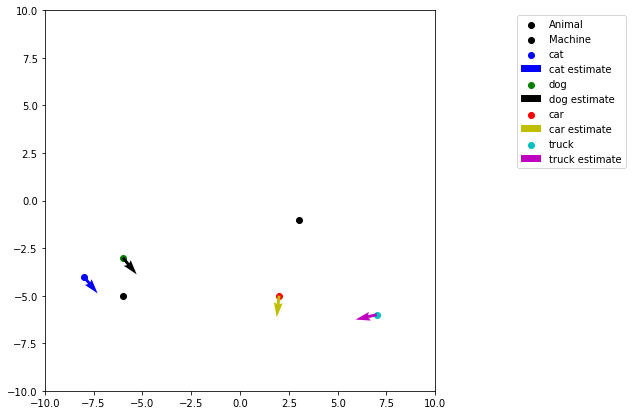

In [ ]:
color_vecs = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.figure(figsize=(7,7))
plt.xlim(-10,10)
plt.ylim(-10,10)
origin = np.array([[0, 0],[0, 0]])
plt.scatter(animal[0], animal[1], label='Animal', color=color_vecs[-1])
plt.scatter(machine[0], machine[1], label='Machine', color=color_vecs[-1])

labs = ["cat", 'dog', 'car', 'truck']

for i in range(len(B)):
  plt.scatter( B[i][0], B[i][1], label=labs[i], color=color_vecs[i])
  est = A[0].dot(B[i])
  laber = labs[i] + ' estimate'
  plt.quiver(*B[i], est[0], est[1], label=laber, color=color_vecs[-i])
plt.legend(bbox_to_anchor=(1.5,1.0))
plt.show()

# **2**

Suppose now that "bus" is encoded as {-2,2} and it is supposed to be transformed close to the point for "machine".

Use the data from (1) including "mouse in (1c) and including "bus" as {-2,2}  with the model U(v) = M dot v + b

## **a**

What are the dimensions of the matrix M and the vector b?

***M*** has dimension 2 because M is 2x2

***b*** has dimension 2 as well as b is 2x1

## **b**

Convert the least squares problem into matrix form by augmenting the vectors with1's so that U(v)=U(v') = X dot v'  What are the dimensions of X?  

In [ ]:
B2augmented = np.array([[-8, -4, 1], [-6, -3, 1], [-5, 3, 1], [2, -5, 1], [7, -6, 1], [-2, 2, 1]])
target2 = np.array([[3, -1], [3, -1], [3, -1], [-6, -5], [-6, -5], [-6, -5]])
print(B2augmented.shape)
print(target2.shape)

(6, 3)
(6, 2)


We know that X has to be a 2x3 matrix, and since there are 3 vectors occupying in a 2-D space by default, we know that the dimensionality of X is 2.

## **c**

Use technology to solve the least squares problem for X.  (either LeastSquares, lsqr, or linalg.lstsq )

In [ ]:
X = np.linalg.lstsq(B2augmented, target2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [ ]:
print(X)

(array([[-0.80488348, -0.35772599],
       [-0.2164168 , -0.09618525],
       [-3.57867003, -3.92385335]]), array([32.19801098,  6.36010094]), 3, array([13.69049041,  9.82820072,  1.72538193]))


## **d**

From X, derive the offset vector b for the least squares solution and the matrix M.

In [ ]:
M = X[0]
b = X[1]
print(M.T)
print(b)

[[-0.80488348 -0.2164168  -3.57867003]
 [-0.35772599 -0.09618525 -3.92385335]]
[32.19801098  6.36010094]


## **e**

Make a picture showing the points in the plane for the encodings as vectors in a plane, with colors or labels to distinguish animals from machines.   Make a picture showing the vectors after the transformation U(v), and include a (labeled or colored) point for the offset vector b.  Compare with the picture for T(v) in (1f)  Which one  do you think is a better model, T or U?

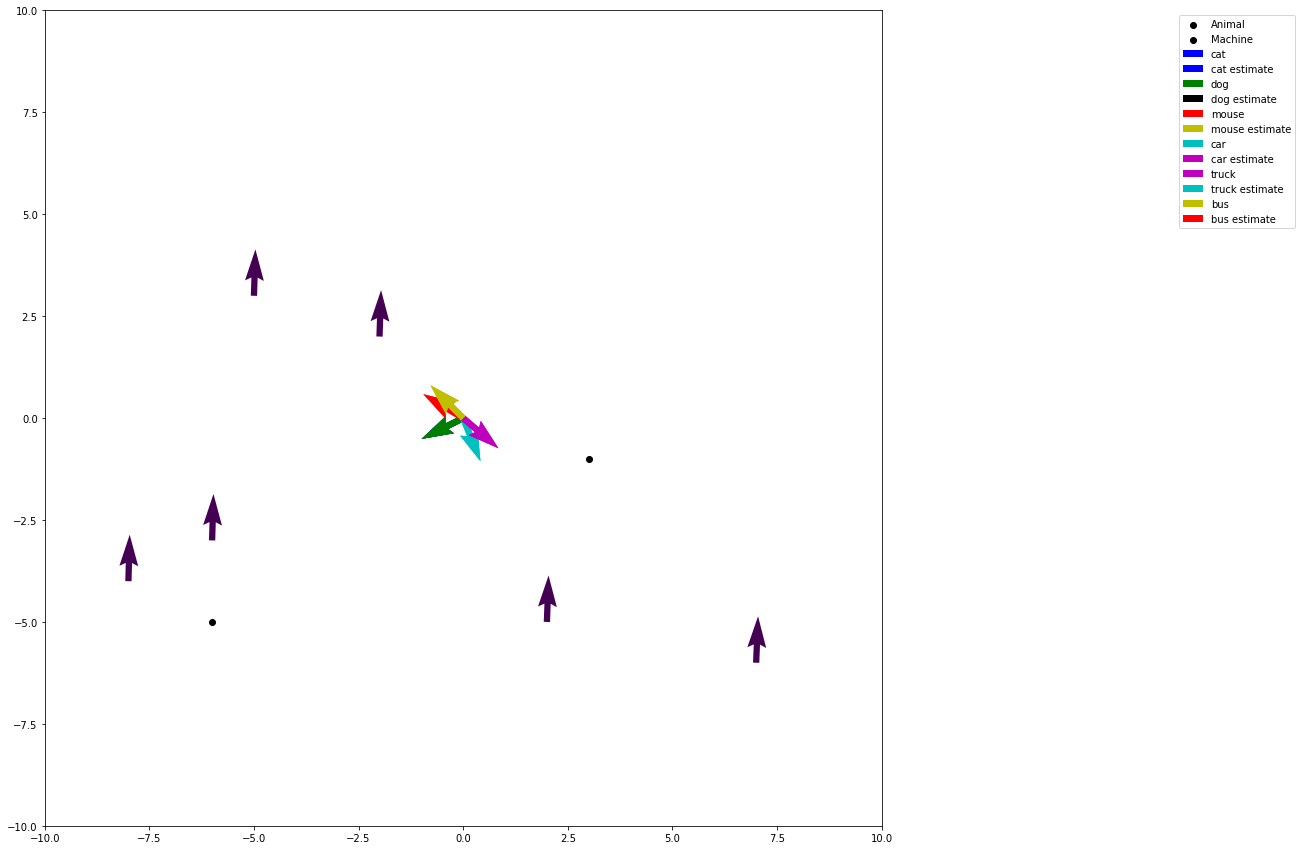

In [ ]:
color_vecs = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.figure(figsize=(15,15))
plt.xlim(-10,10)
plt.ylim(-10,10)

plt.scatter(animal[0], animal[1], label='Animal', color=color_vecs[-1])
plt.scatter(machine[0], machine[1], label='Machine', color=color_vecs[-1])

labs = ["cat", 'dog','mouse', 'car', 'truck','bus']
origin = np.array([[0, 0],[0, 0]])
for i in range(len(B2augmented)):
  plt.quiver(*origin, B2augmented[i][0], B2augmented[i][1], label=labs[i], color=color_vecs[i])
  est = M.T.dot(B2augmented[i]) + b
  laber = labs[i] + ' estimate'
  plt.quiver(*B2augmented[i], est[0], est[1], label=laber, color=color_vecs[-i])
plt.legend(bbox_to_anchor=(1.5,1.0))
plt.show()

Our new model U is worse than model T because we have a strong bias towards being an animal over a machine as all the vectors are pointing up. This causes our model to be inherently biased towards calling every object an animal and not a machine. Hence model T is better.

***NOTE:*** In my opinion, the graph below is a better visual because I am not sure how to scale these vectors s.t. they actually reach the point where they are at. It makes it very difficult to visually see what is happening, hence plotting the encodings as points themselves, and then showing the transformation as a vector gives an easier visual. This is something extra I built.

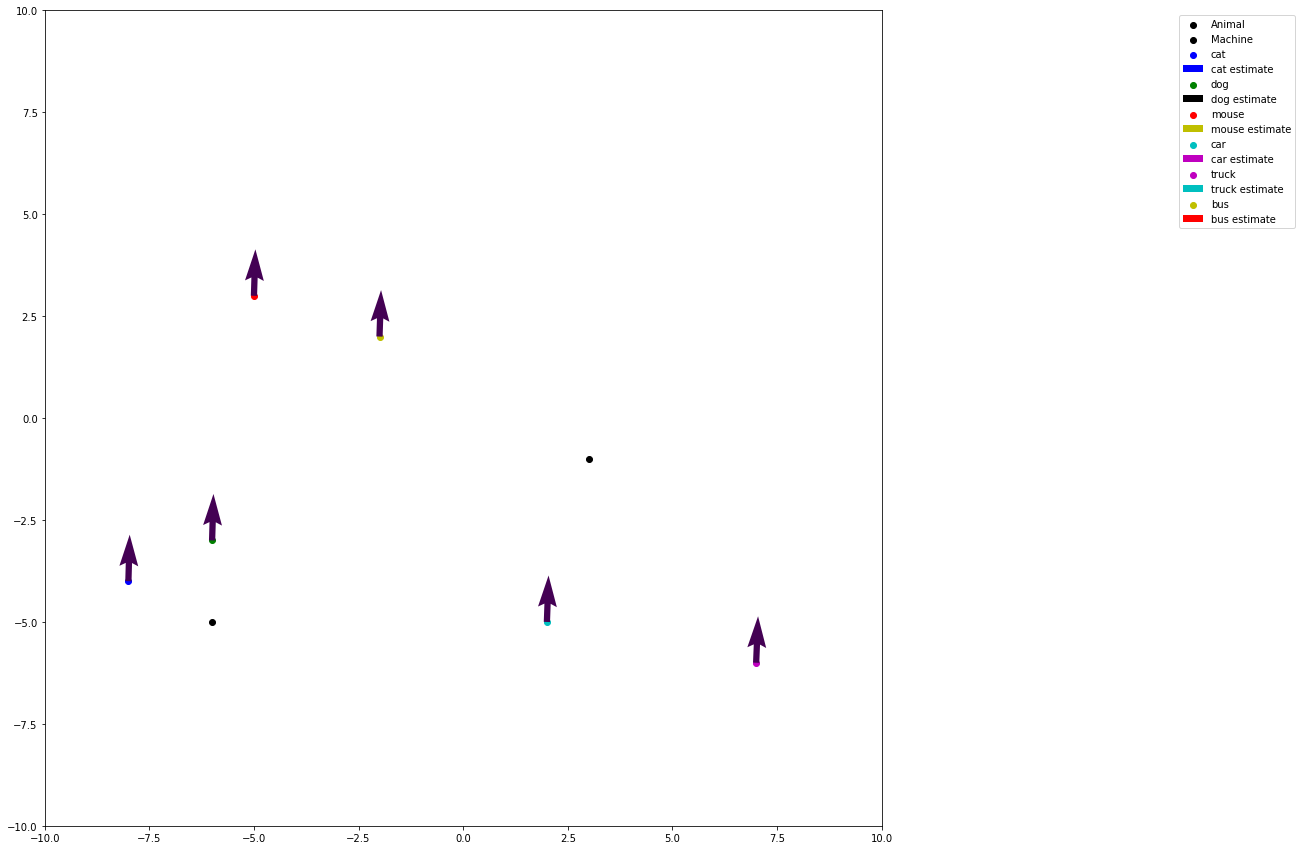

In [ ]:
color_vecs = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.figure(figsize=(15,15))
plt.xlim(-10,10)
plt.ylim(-10,10)

plt.scatter(animal[0], animal[1], label='Animal', color=color_vecs[-1])
plt.scatter(machine[0], machine[1], label='Machine', color=color_vecs[-1])

labs = ["cat", 'dog','mouse', 'car', 'truck','bus']
origin = np.array([[0, 0],[0, 0]])
for i in range(len(B2augmented)):
  plt.scatter(B2augmented[i][0], B2augmented[i][1], label=labs[i], color=color_vecs[i])
  est = M.T.dot(B2augmented[i]) + b
  laber = labs[i] + ' estimate'
  plt.quiver(*B2augmented[i], est[0], est[1], label=laber, color=color_vecs[-i])
plt.legend(bbox_to_anchor=(1.5,1.0))
plt.show()

# **3**

## **a**

Given A1 = {{0, 7}, {-8, 3}}   Find the inverse of A1 (numerically, no fractions)

In [ ]:
A1 = np.array([[0, 7], [-8, 3]])
A1_inv = np.linalg.inv(A1)
print(A1_inv.T)

[[ 0.05357143  0.14285714]
 [-0.125       0.        ]]


## **b**

Given A2 = {{0, 7}, {-8, 3},{0,-1}}   Find the pseudoinverse of A2 (numerically, no fractions)

In [ ]:
A2 = [[0, 7], [-8, 3], [0, -1]]
A2_inv = np.linalg.pinv(A2)
print(A2_inv.T)

[[ 5.25000000e-02  1.40000000e-01]
 [-1.25000000e-01 -9.14594931e-18]
 [-7.50000000e-03 -2.00000000e-02]]


## **c**

Given A3 = {{0, 7}, {-8, 3},{0,-1},{1,0}}   Find the pseudoinverse of A3 (numerically, no fractions)

In [ ]:
A3 = [[0, 7], [-8, 3], [0, -1], [1, 0]]
A3_inv = np.linalg.pinv(A3)
print(A3_inv.T)

[[ 0.05154956  0.13961338]
 [-0.12273704  0.00092053]
 [-0.00736422 -0.01994477]
 [ 0.01810371  0.00736422]]


## **d**

Compare a with b with c and say what is in common.  Can you explain why some of their coefficients are very close?  (MatrixPlot might be helpful)

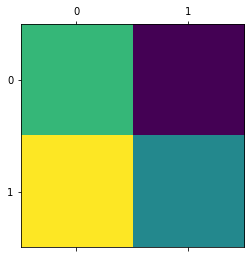

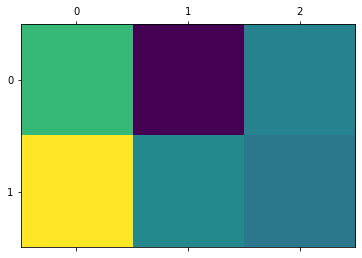

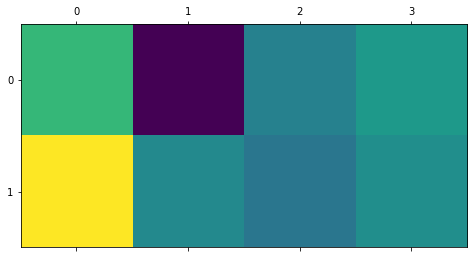

In [ ]:
plt.matshow(A1_inv)
plt.matshow(A2_inv)
plt.matshow(A3_inv)
plt.show()

The coefficients in the inverse matrices are very close. As per our diagram, we can see that the colors are very similar across all the inverse matrices in the common squares. 

This is because we approximate the inverse by effectively taking a least squares and then deriving what the closest value would be to an actual inverse of the matrix. Hence that is why all the values seem so close.